In [1]:
!pip install langid


In [2]:
!pip install stop-words


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set()


import warnings 
warnings.filterwarnings("ignore")


#for datacleaning
from string import punctuation
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
##training data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import pandas as pd

# Load the training set
train_df = pd.read_csv('train_set.csv')

# Load the test set
test_df = pd.read_csv('test_set.csv')



In [5]:
print(train_df.head())


  lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
test_df.tail()

,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


In [7]:
print(train_df.columns)

Index(['lang_id', 'text'], dtype='object')


In [8]:
# Display basic statistics and information about the training set
train_df.info()
train_df.describe()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


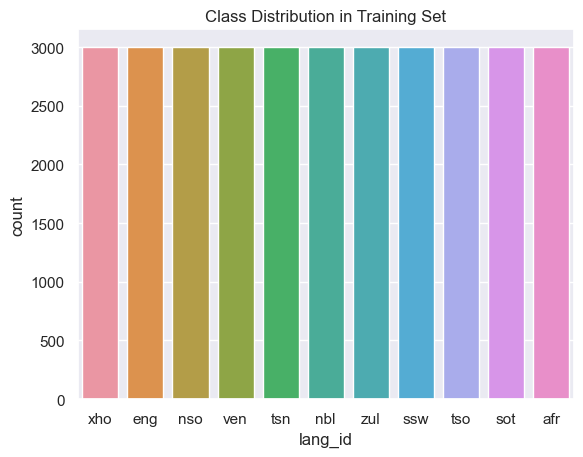

In [9]:
# Check the distribution of classes in the training set
sns.countplot(x='lang_id', data=train_df)
plt.title('Class Distribution in Training Set')
plt.show()


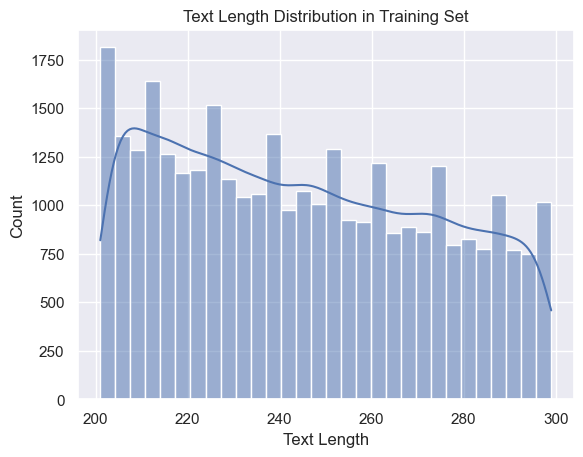

In [10]:
# Explore the distribution of text lengths in the training set
train_df['Text Length'] = train_df['text'].apply(len)
sns.histplot(train_df['Text Length'], bins=30, kde=True)
plt.title('Text Length Distribution in Training Set')
plt.show()

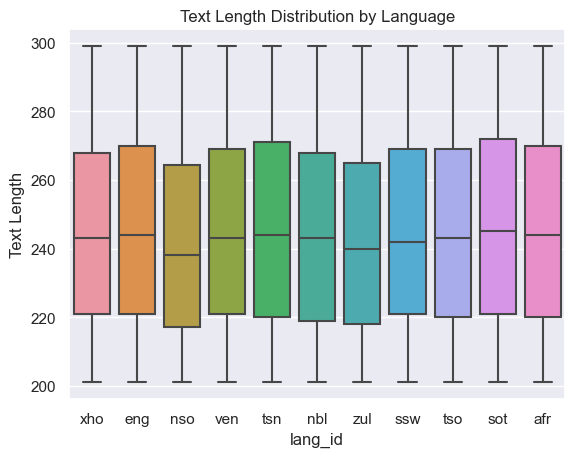

In [11]:
train_df['Text Length'] = train_df['text'].apply(len)
sns.boxplot(x='lang_id', y='Text Length', data=train_df)
plt.title('Text Length Distribution by Language')
plt.show()

In [12]:
import string

# Define the new remove_punctuation function
def remove_punctuation(text_list):
    translator = str.maketrans('', '', string.punctuation)
    text_no_punct = [str(text).translate(translator) for text in text_list]
    return text_no_punct

In [13]:
# Assuming train_df and test_df contain your training and testing data
train_df['text'] = remove_punctuation(train_df['text'])
test_df['text'] = remove_punctuation(test_df['text'])



In [14]:
from nltk.corpus import stopwords

from nltk.corpus import stopwords

def remove_stopwords(text, lang_id):
    # Define stopwords for different languages

    en_stopwords = set(stopwords.words('english'))

    # Select the stopwords based on the provided lang_id
    if lang_id == 'en':
        stopwords_set = en_stopwords
    else:
        # If lang_id is not recognized, return the original text without removing any stopwords
        return text

    # Split the text into words and filter out stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

    # Use NLTK English stopwords
    en_stopwords = set(stopwords.words('english'))

    # Select the stopwords based on the provided lang_id
    if lang_id == 'zul':
        stopwords_set = zul_stopwords
    elif lang_id == 'afr':
        stopwords_set = afr_stopwords
    elif lang_id == 'sot':
        stopwords_set = sot_stopwords
    elif lang_id == 'nso':
        stopwords_set = nso_stopwords
    elif lang_id == 'en':
        stopwords_set = en_stopwords
    else:
        # If lang_id is not recognized, return the original text without removing any stopwords
        return text

    # Split the text into words and filter out stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text


In [15]:
 # Assuming 'lang_id' is a column in your DataFrame
languages = train_df['lang_id'].unique()




In [16]:

# Assuming lang_ids is a list of language IDs
lang_ids = ['en', 'fr', 'es', 'de', '...']

# Loop through each language ID
for lang_id in lang_ids:
    # Assuming test_df is your DataFrame
    test_df['text'] = test_df['text'].apply(lambda x: remove_stopwords(x, lang_id=lang_id))


In [17]:
train_df['text'] = train_df['text'].apply(lambda x: word_tokenize(str(x)))


In [18]:
test_df['text'] = test_df['text'].apply(lambda x: word_tokenize(str(x)))


In [19]:
print(train_df.columns)


Index(['lang_id', 'text', 'Text Length'], dtype='object')


In [20]:
from collections import Counter

def bag_of_words_count(words, word_dict=None):
    """ This function takes in a list of words or a string and returns a dictionary
        with each word as a key, and the value represents the number of
        times that word appeared """
    if word_dict is None:
        word_dict = Counter()

    # If the input is a string, tokenize it into a list of words
    if isinstance(words, str):
        words = words.split()

    word_dict.update(words)
    return word_dict


In [21]:
# Assuming 'lang_id' is a column in your DataFrame
languages = train_df['lang_id'].unique()


In [22]:
# Create a dictionary to store bag-of-words representations for each language
languages_bow = {}

# Group the DataFrame by 'lang_id'
train_df_grouped = train_df.groupby('lang_id')

# Iterate over the unique values in the 'lang_id' column
for lang in languages:
    # Initialize a bag-of-words dictionary for the current language
    languages_bow[lang] = Counter()

    # Get the group for the current language
    lang_group = train_df_grouped.get_group(lang)

    # Iterate over the rows in the group
    for row in lang_group['text']:
        # Flatten the list if it's a list of lists
        words = [word for sublist in row for word in sublist]

        # Update the bag-of-words dictionary for the current language
        languages_bow[lang] = bag_of_words_count(words, languages_bow[lang])

    # Update the set of all unique words


In [23]:
#test data
def bag_of_words_count(words, word_dict=None):
    """ This function takes in a list of words and returns a dictionary
        with each word as a key, and the value represents the number of
        times that word appeared """
    if word_dict is None:
        word_dict = {}

    for word in words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1

    return word_dict

In [24]:
# Initialize a combined bag-of-words dictionary for the test data
combined_bow_test = {}

# Initialize a set to store all unique words across all texts
all_words_test = set()

# Iterate over the 'text' column of textdata (assuming 'textdata' is your test dataset)
for text in test_df['text']:
    # Check if text is a non-empty list before processing
    if isinstance(text, list) and text:
        # Update the combined bag-of-words dictionary for the test data
        combined_bow_test = bag_of_words_count(text, combined_bow_test)

        # Update the set of all unique words
        all_words_test.update(text)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

## Convert lists of words to strings for training data
train_texts = [' '.join(map(str, text)) if isinstance(text, list) else str(text) for text in train_df['text']]


In [26]:
# Convert lists of words to strings for test data
test_texts = [' '.join(map(str, text)) if isinstance(text, list) else str(text) for text in test_df['text']]


In [27]:
# Vectorize the training data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_texts)


In [28]:
# Vectorize the test data
X_test = vectorizer.transform(test_texts)


In [29]:
# Create targets for training
y_train = train_df['lang_id']



In [30]:
# Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
######receck this makesure yourbariables are consistent



In [31]:
# Train the KNN model using the training split
# Train the KNN model using the training split
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_split, y_train_split)


KNeighborsClassifier()

In [32]:
# Predict on the test set
knn_pred = knn_model.predict(X_test_split)


In [33]:


# Evaluate the model using the test split
accuracy = accuracy_score(y_test_split, knn_pred)
precision = precision_score(y_test_split, knn_pred, average='weighted')
f1 = f1_score(y_test_split, knn_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_split, knn_pred)

In [34]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')

Accuracy: 0.9638
Precision: 0.9641
F1 Score: 0.9635
Confusion Matrix:


In [35]:
import joblib

# Assuming knn_model is your trained KNN model
knn_model.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(knn_model, 'knn_model.joblib')

# Make predictions on the test set
knn_pred = knn_model.predict(X_test)

# Create the submission DataFrame
submission_df = pd.DataFrame({
    "index": test_df['index'],
    "lang_id": knn_pred
})

# Save the DataFrame to a CSV file
submission_df.to_csv('knn_submission.csv', index=False)
